# SC1015 FCSH Team 8 Mini-Project

## Problem Statement
Given the alarming statistics surrounding lung cancer, particularly its status as the leading cause of cancer death worldwide, there is an urgent need for further understanding and identification of risk factors that contribute to its development.


## Background on Issue
Recent research, such as the study published in Nature Medicine, has highlighted the potential link between air pollution and increased risk of lung cancer, even among nonsmokers. This groundbreaking study, which analyzed data from over 462,000 individuals in China, found that exposure to high levels of air pollution was associated with a higher likelihood of developing lung cancer, with a particularly pronounced effect observed in nonsmokers. These findings underscore the critical importance of identifying and understanding the various factors contributing to lung cancer risk, including environmental exposures such as air pollution.

By leveraging the dataset provided, our group has the opportunity to contribute to this vital area of research by exploring the correlation between different stages of lung cancer and its associated features. Through rigorous analysis and statistical modeling, we can uncover potential biomarkers, genetic predispositions, and lifestyle factors that may influence the progression and severity of lung cancer.

## Goal of our Project

We aim to utilise the available dataset that has been collected by health professionals to attempt to correlate and discover signs and symptoms of different stages of lung cancer disease. 

By differenciating between each symptom and their association with stages of lung cancer, we hope that it can be of use to health professionals to better accurately identify lung cancer within patients, as well as the stage of cancer they are in. On the larger scale, governments can possibly make use of the model and their vast datasets to inform public health initiatives and policy decisions aimed at reducing lung cancer incidence, whilst improving early detection and intervention strategies. 

By exploring the complexities of the lung cancer disease and the potential underlying determinants itself, we can ultimately strive towards a more effective prevention and treatment approach, leading to improved outcomes for individuals affected by this devastating disease.

In [1]:
# data set from https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
data = pd.read_csv('cancer patient data sets.csv')
data.head()
#printing the dataset

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# Data Cleaning & EDA

In [2]:
data.info() #checking for non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [3]:
data['Level'].replace(['Low', 'Medium','High'],
                        [0, 1, 2], inplace=True) # changing variable Level to numerical variable

In [4]:
numeric_data = data.drop(["index","Patient Id"],axis = 1) # dropping useless data

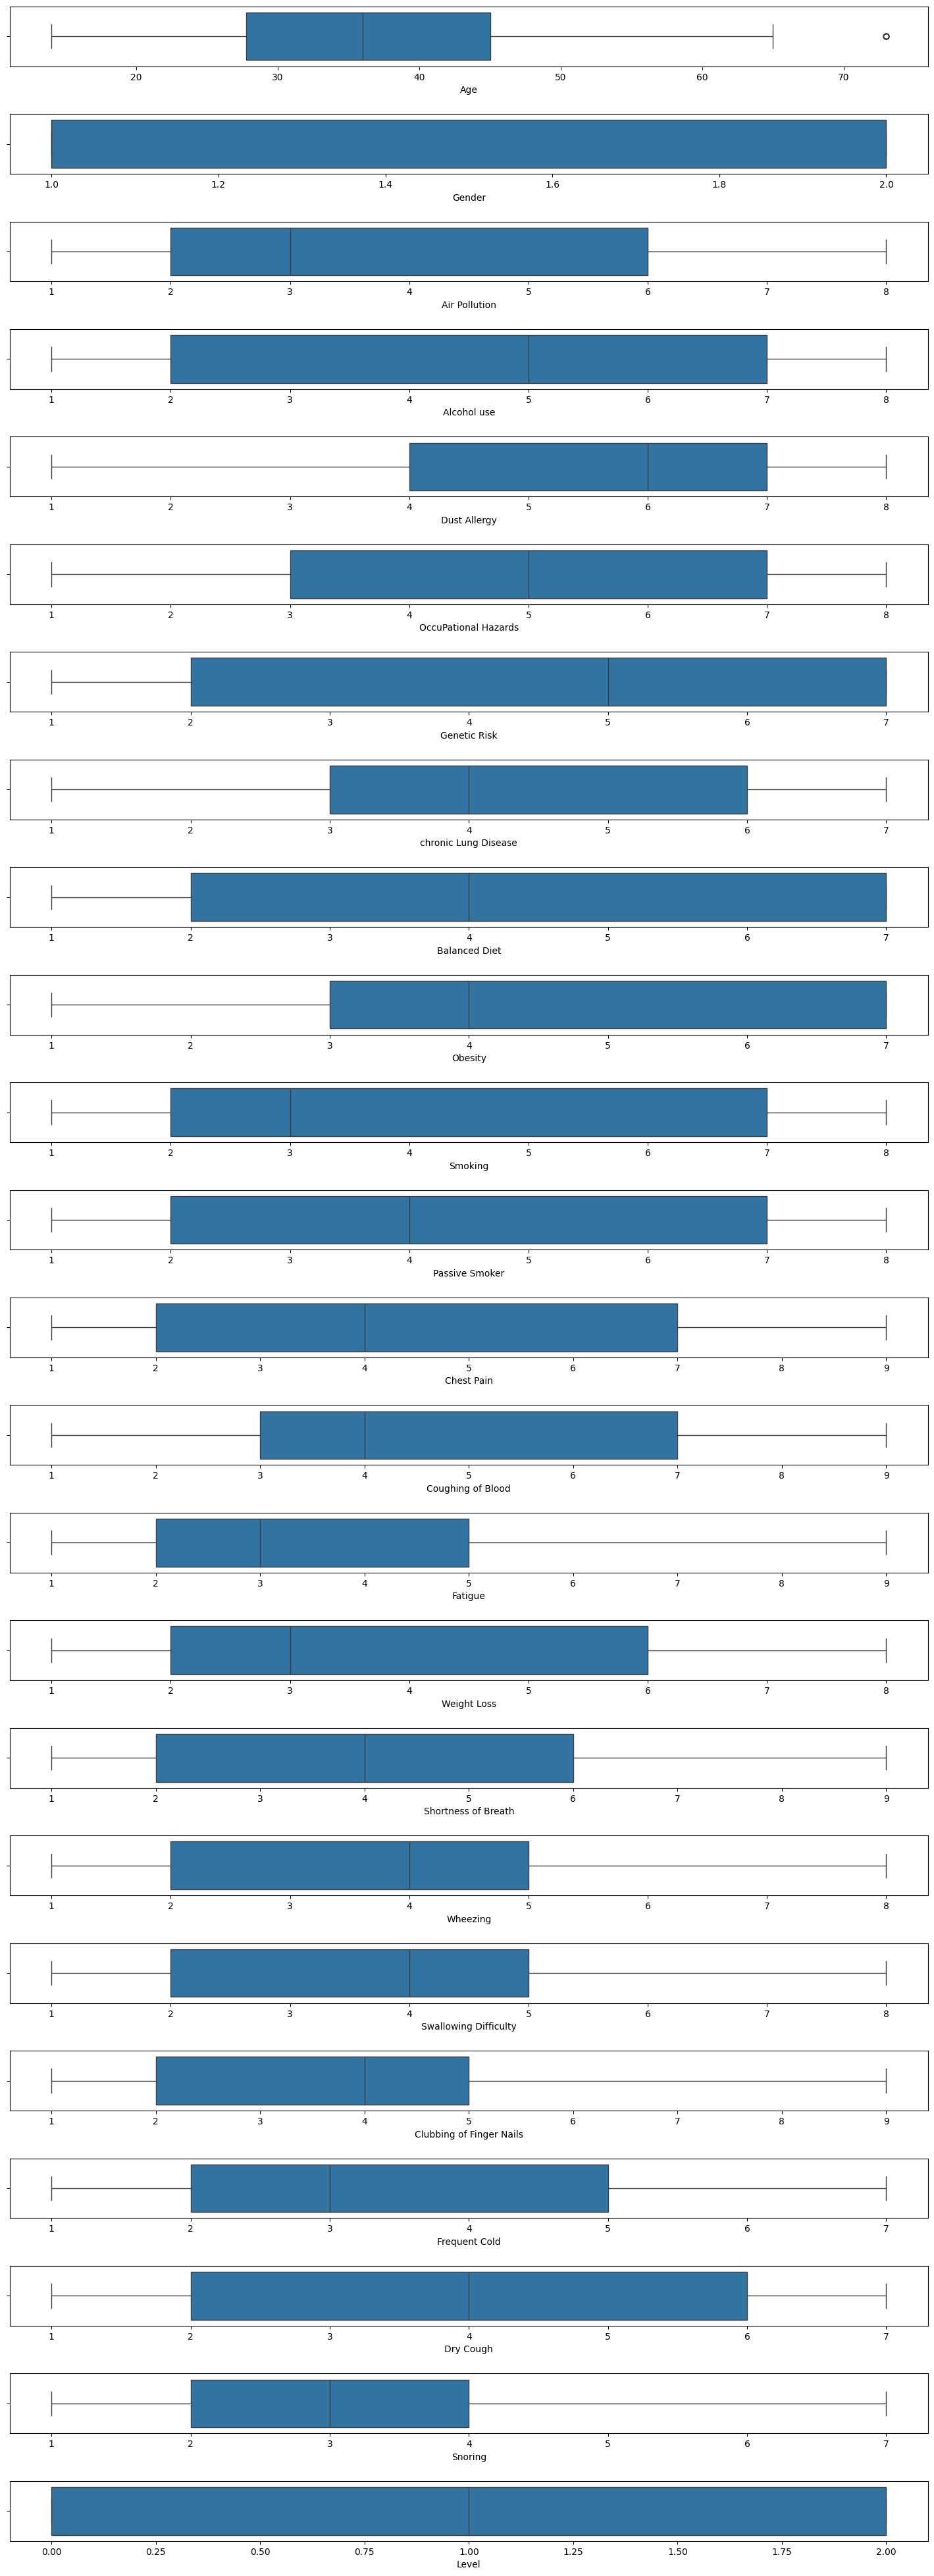

In [5]:
# Visualisation of boxplots to look for outliers
f, axes = plt.subplots(24, figsize=(18, 50))
plt.subplots_adjust(hspace = 0.8)

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count])
    count += 1

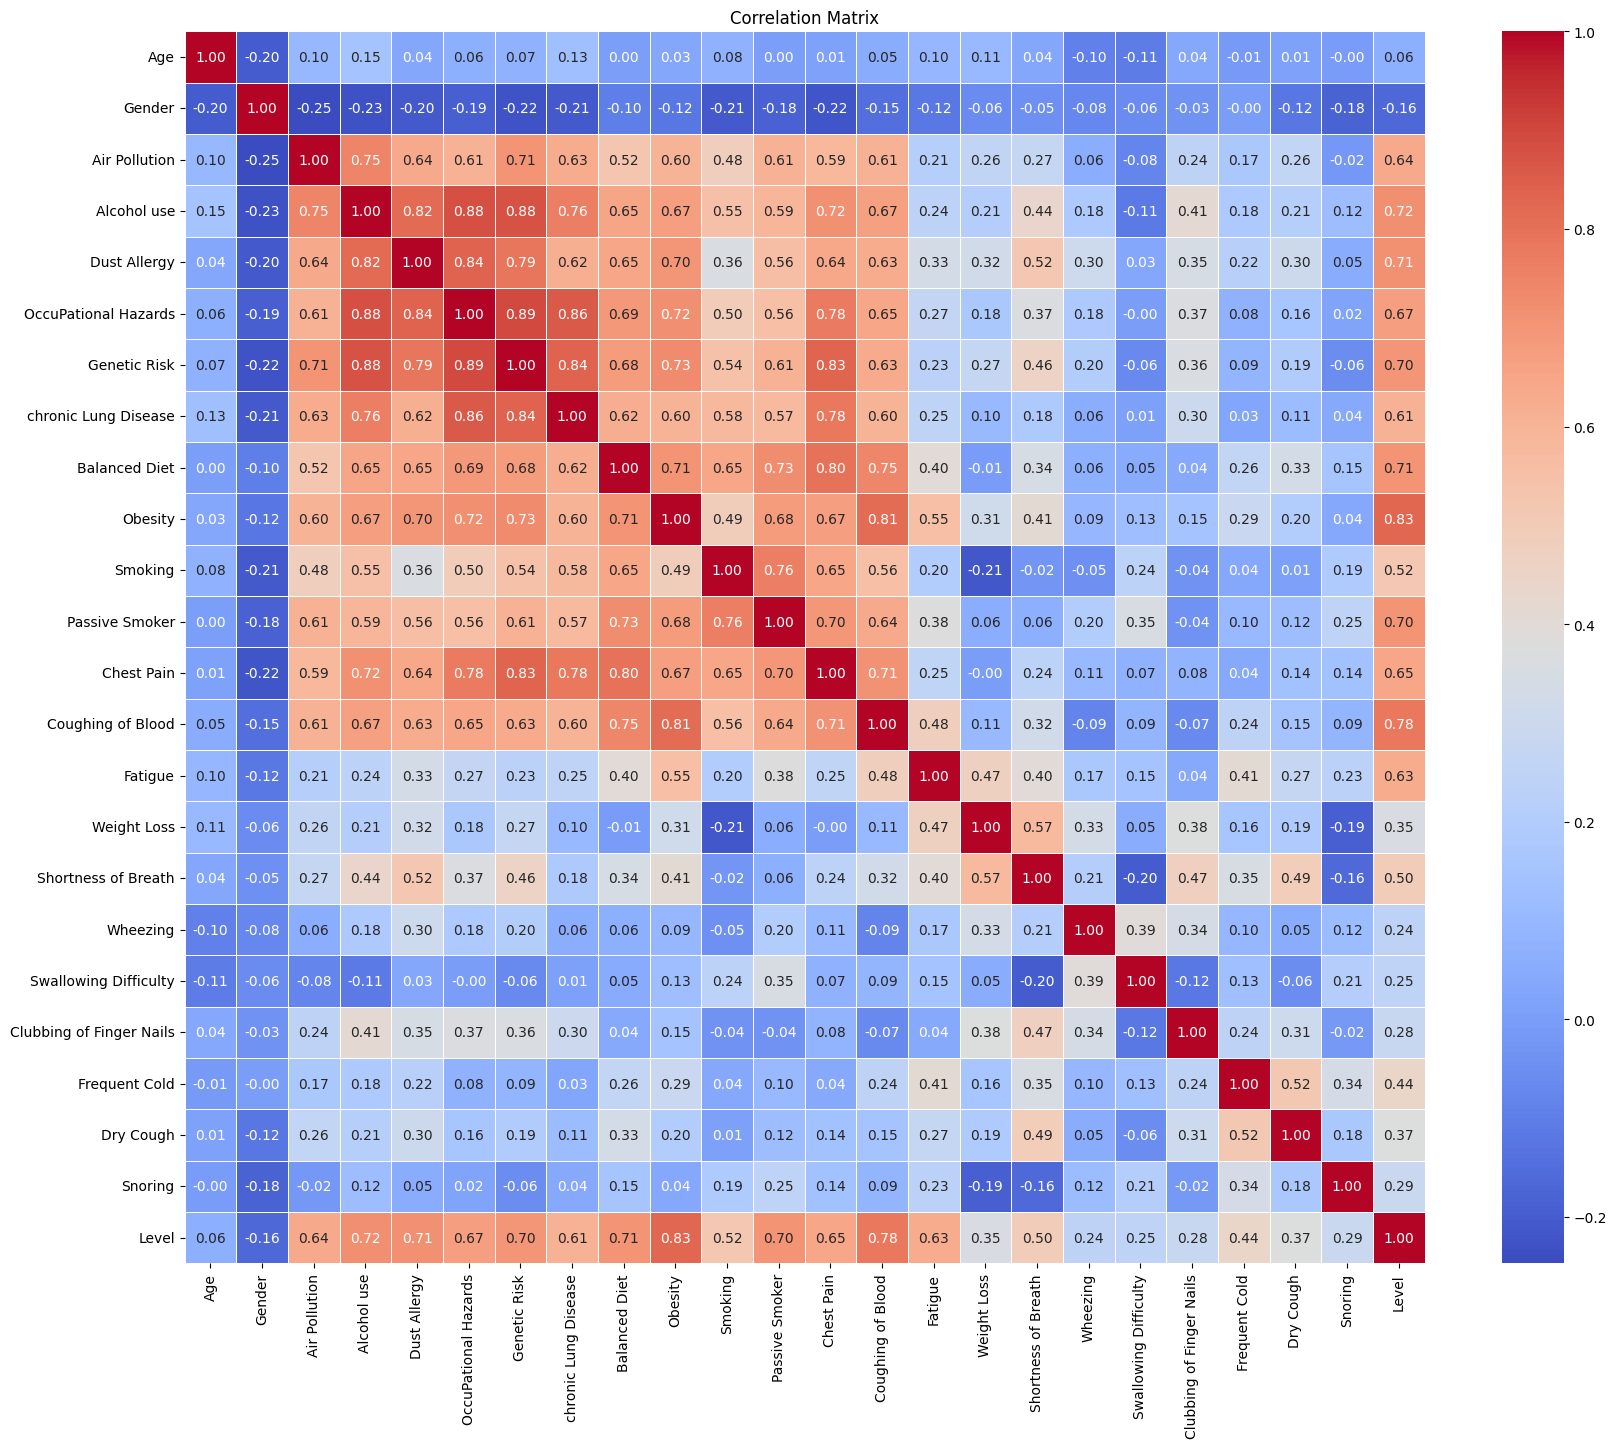

In [6]:
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Insights from above EDA (at a glance)

Features with >= 0.7 correlation with lung cancer severity(level):
1) Obesity 0.83
2) Coughing of Blood 0.78
3) Alcohol Use 0.72
4) Dust Allergy 0.71
5) Balanced Diet 0.71
6) Genetic Risk 0.70
7) Passive Smoker 0.70

For Balanced Diet, it might be because of their lung cancer that causes them to have a balance diet and not the other way around.
The correlation analysis in our EDA section emphasizes the significance of the research question and its potential impact on public health and clinical practice as it also aligns with the existing evidence from the study cited, reinforcing the relevance and urgency of the proposed investigation.

# Random Forest Model for a new perspective

Using the Random Forest Model, its training will highlight other features that are influential towards predicting lung cancer and its severity. This complements the correlation measurements and gives us further insight into other features that may not be shown through the correlation method.

In [7]:

# 'X' contains your features (other variables) and 'y' contains our target variable ('Level' for Lung Cancer Severity)

X = numeric_data.drop(["Level"],axis=1)
# Y contains the target variable, Lung cancer Severity
y = numeric_data["Level"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Extract feature importances
importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending =False)

# Print the top 3 features for each lung cancer severity category
num_top_features = 3
for severity_category in y.unique():
    print(f"\nTop {num_top_features} features for {severity_category} lung cancer severity:")
    top_features = feature_importance_df[feature_importance_df.index.isin(y[y == severity_category].index)].head(num_top_features)
    print(top_features)


Top 3 features for 0 lung cancer severity:
                 Feature  Importance
14               Fatigue    0.065887
6           Genetic Risk    0.037786
7   chronic Lung Disease    0.017274

Top 3 features for 1 lung cancer severity:
          Feature  Importance
9         Obesity    0.085630
12     Chest Pain    0.047938
8   Balanced Diet    0.043398

Top 3 features for 2 lung cancer severity:
              Feature  Importance
13  Coughing of Blood    0.112728
11     Passive Smoker    0.099777
17           Wheezing    0.075292


# Feature Importance by Severity

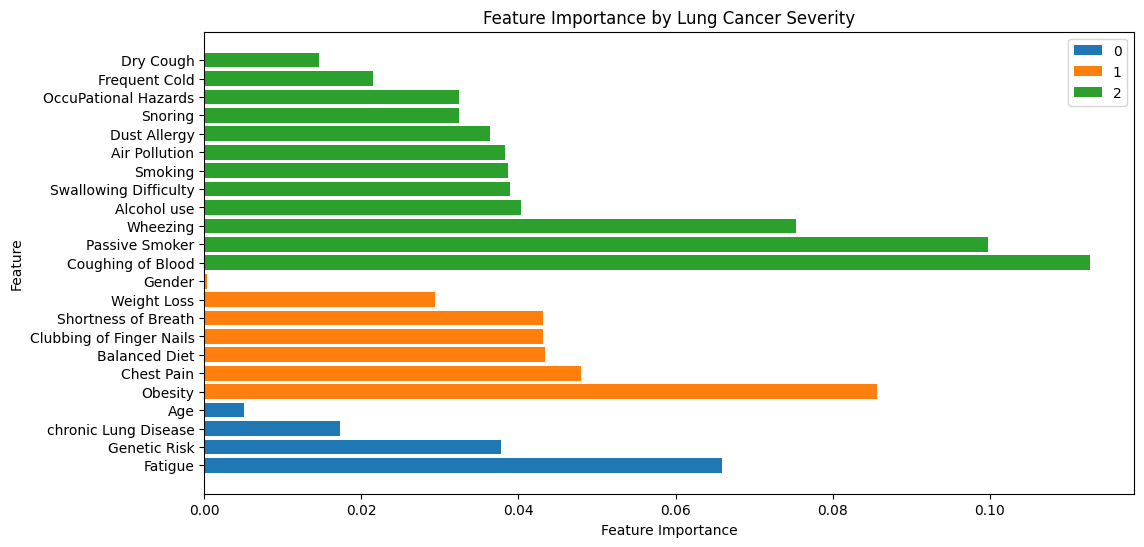

In [8]:
#This code is for visualisation of the feature importance by Severity Level
# Group feature importance by lung cancer severity level
feature_importance_by_severity = {}
for severity_category in y.unique():
    feature_importance_by_severity[severity_category] = feature_importance_df[feature_importance_df.index.isin(y[y == severity_category].index)]

# Plot feature importance for each severity level
plt.figure(figsize=(12, 6))
for severity_category, importance_df in feature_importance_by_severity.items():
    plt.barh(importance_df['Feature'], importance_df['Importance'], label=severity_category)

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Lung Cancer Severity')
plt.legend()
plt.show()

# Overall Feature Importance for Lung Cancer

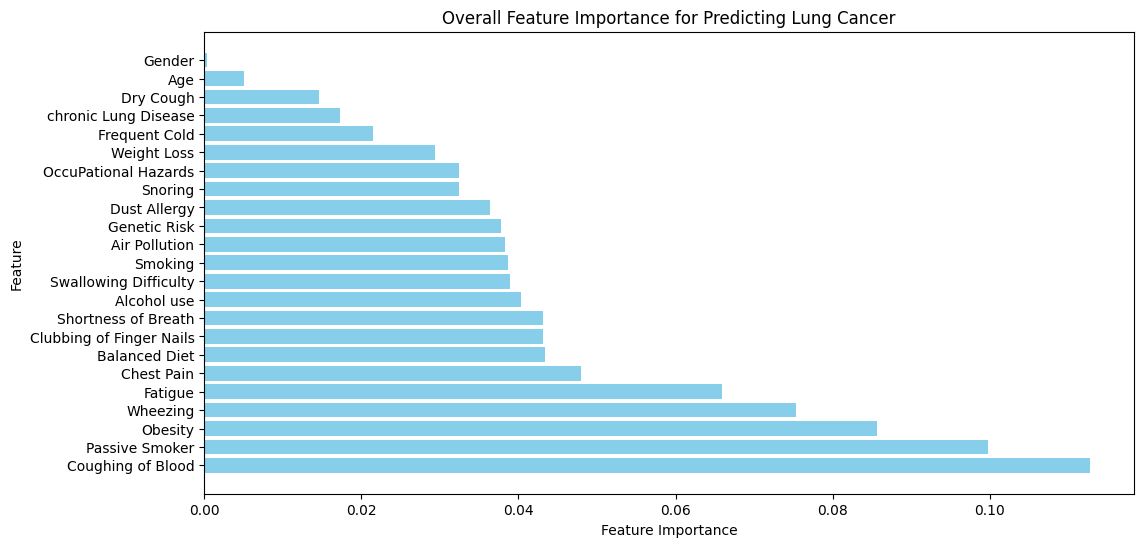

In [9]:
#This code is for visualisation of the feature importance in general
# Calculate overall feature importance
overall_feature_importance = feature_importance_df.groupby('Feature')['Importance'].sum().reset_index()

# Sort feature importance in descending order
overall_feature_importance = overall_feature_importance.sort_values(by='Importance', ascending=False)

# Plot overall feature importance
plt.figure(figsize=(12, 6))
plt.barh(overall_feature_importance['Feature'], overall_feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Overall Feature Importance for Predicting Lung Cancer')
plt.show()

# Insights from above 2 graphs (At a glance)

The feature importance scores are normalized to sum up to 1 across all features. Hence Coughing of Blood at 0.112728 means it explains approximately 11.27% of the variation in lung cancer severity.

Top 5:
| Rank | Feature            | Importance |
|------|--------------------|------------|
| 1    | Coughing of Blood | 0.112728   |
| 2    | Passive Smoker    | 0.099777   |
| 3    | Obesity            | 0.085630   |
| 4    | Wheezing           | 0.075292   |
| 5    | Fatigue            | 0.065887   |

Looking at the top 5, only (1), (2) and (4) were listed as important for the highest severity of lung cancer, and (3) from severity 1, (5) from severity 0.

For the features in severity 0, chronic disease, age and genetics are not curable, so that leaves Fatigue.

For the features in severity 1, we see that Obesity almost doubles each of the other important features in importance.

For the features in severity 2, wheezing, passive smoking and coughing of blood also doubles/triples the other important features in importance.

# Evaluating accuracy of Random Forest Model

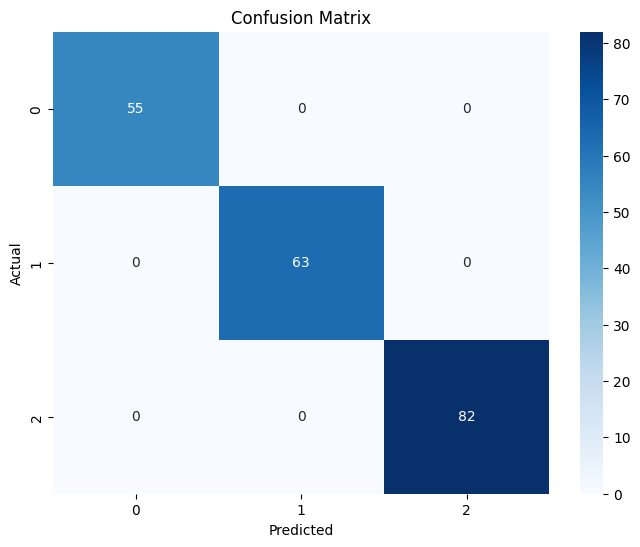

In [10]:
#This code is to plot the confusion matrix
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
#This code block is to make use of Cross-Validation Method to evaluate the accuracy of the Random Forest Model
#The method we are using is K-fold cross-validation
#It makes multiple different test-train datasets and then compares their accuracy
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100)

# Initialize the StratifiedKFold cross-validation splitter
# Remove the random_state parameter to allow for random splitting in each iteration
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation
cv_scores = cross_val_score(gbm_classifier, X, y, cv=cv_splitter, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print mean and standard deviation of cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0


# Showing how test/train data sets have been distributed to see if there is class imbalance

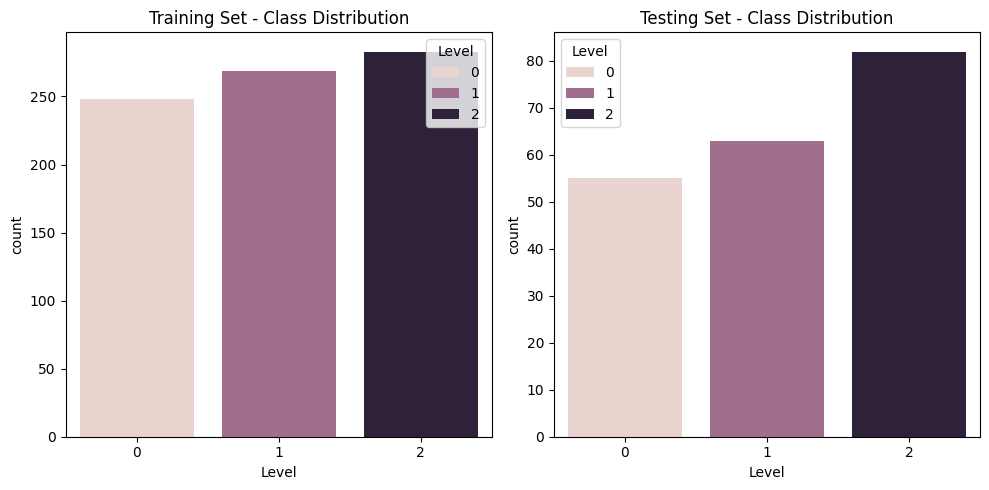

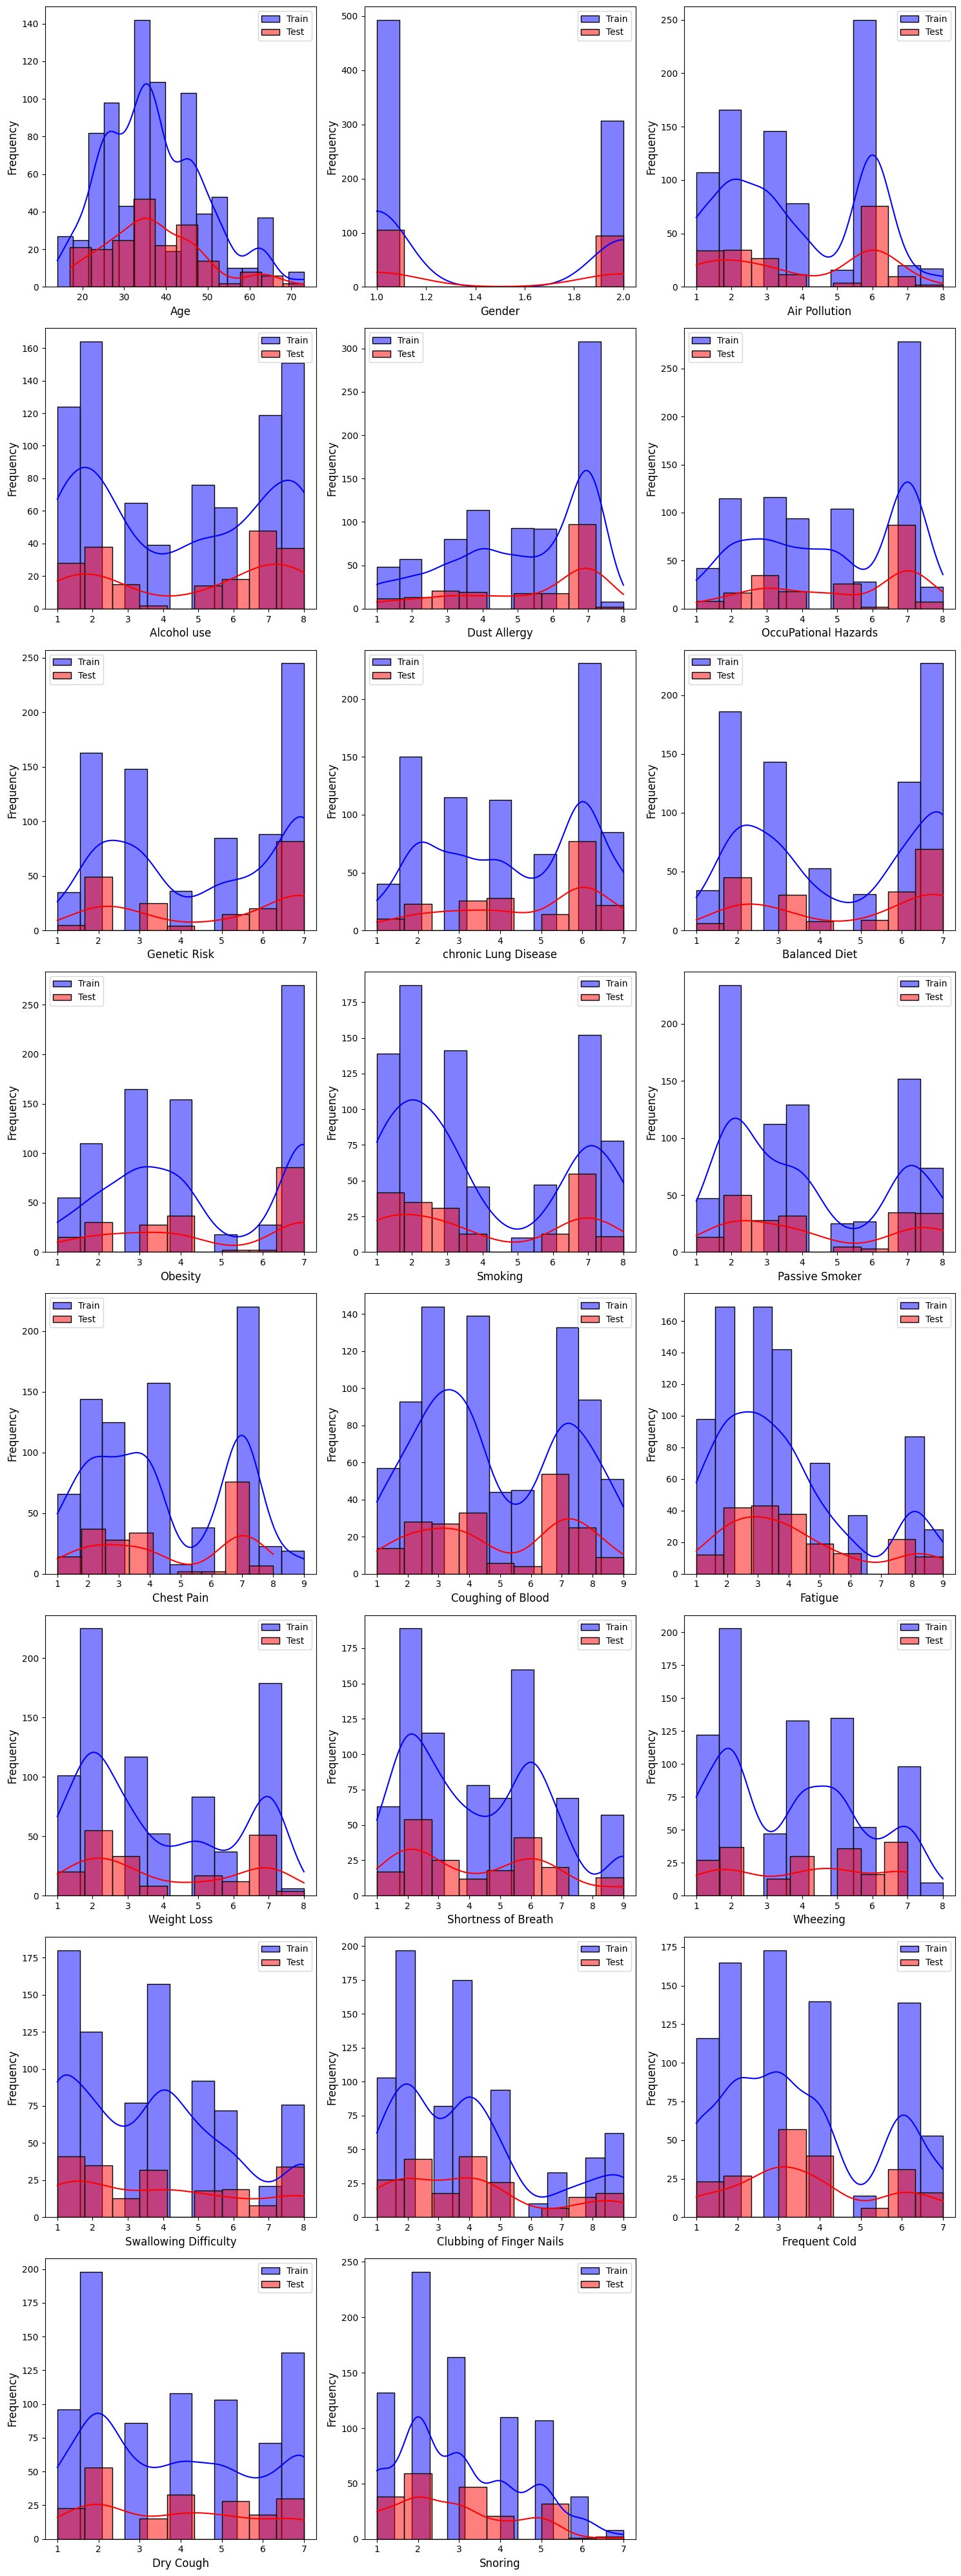

In [12]:
#This code is the visualisation of the distributions of each Severity Level
#This is to check is there is an imbalance such that the model learns to only predict one of its values instead
# Visualize class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sb.countplot(x=y_train, hue=y_train)
plt.title('Training Set - Class Distribution')

plt.subplot(1, 2, 2)
sb.countplot(x=y_test, hue=y_test)
plt.title('Testing Set - Class Distribution')
plt.tight_layout()
plt.show()

# Visualize feature distributions
num_features = len(X.columns)
num_rows = (num_features + 2) // 3  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(X.columns):
    plt.subplot(num_rows, 3, i + 1)
    sb.histplot(X_train[feature], color='blue', kde=True, label='Train')
    sb.histplot(X_test[feature], color='red', kde=True, label='Test')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
plt.tight_layout()
plt.show()


# Support Vector Machines (SVM):
SVM is a powerful classification algorithm that finds the hyperplane that best separates the classes in feature space. It can handle linear and nonlinear classification tasks and is effective in high-dimensional spaces.

SVMs are less prone to overfitting compared to Random Forests, especially when the number of features is greater than the number of samples. SVMs use a regularization parameter (C) to control the trade-off between maximizing the margin and minimizing the classification error.

Accuracy: 0.965
Precision: 0.9672661233167966


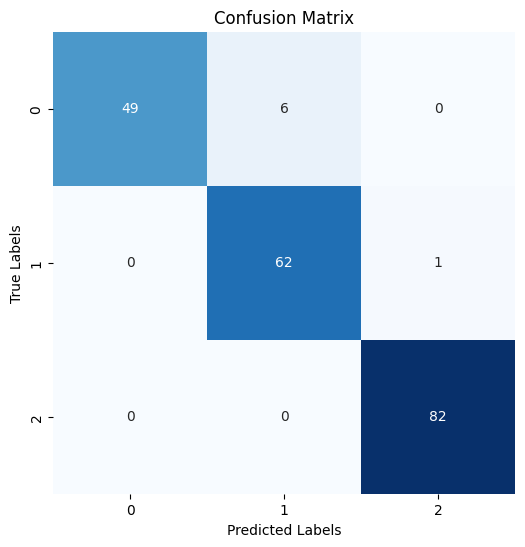

In [13]:
#This code block is to set up the SVM model, train it and then test it on test set
#After that, we print out the confusion matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the dataset into features (X) and target (y) (lung cancer Severity Level)
X = numeric_data.drop(columns=['Level'])  # Features
y = numeric_data['Level']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
# Precision measures the ratio of correctly predicted positive observations to the total predicted positives.
print("Precision:", precision)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [14]:
#Same as Random Forest, we are evaluating the accuracy of SVM model using cross-validation
#Same method of K-fold cross-validation is done
# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Initialize the StratifiedKFold cross-validation splitter
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=cv_splitter, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print mean and standard deviation of cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.985 0.98  0.97  0.95  0.985]
Mean Accuracy: 0.974
Standard Deviation of Accuracy: 0.01319090595827293


## Pros and Cons of Random Forest

### Pros
High accuracy: 
Achieving a perfect accuracy of 1.00 is impressive and indicates that the model is performing exceptionally well on the given dataset.

Robustness: 
Random forests are known for their robustness to overfitting as opposed to single-decision trees, thanks to the ensemble learning technique and the use of multiple decision trees.

Feature importance: 
Random forests provide a measure of feature importance, which can help in understanding the contribution of each feature to the model's predictions.

Handling missing values: 
Random forests can handle missing values in the dataset without requiring imputation, making them convenient for real-world datasets.

### Cons

Interpretability: 
While feature importance is a valuable aspect of random forests, interpreting the individual decision trees within the ensemble can be challenging, particularly for large forests.

Computational complexity: 
Training a random forest model can be computationally expensive, especially for large datasets with many features and trees.

Parameter tuning: 
Random forests have several hyperparameters that need to be tuned for optimal performance, which can require extensive computational resources and experimentation.

Bias towards majority class:
In imbalanced datasets, random forests may exhibit a bias towards the majority class, leading to suboptimal performance for minority classes unless addressed through techniques like class weighting or resampling.

## Pros and Cons of SVM
SVM is a powerful classification algorithm that finds the hyperplane that best separates the classes in feature space. It can handle linear and nonlinear classification tasks and is effective in high-dimensional spaces.

### Pros
Robust to Overfitting:
SVMs are less prone to overfitting compared to other complex models like decision trees or neural networks, especially when the number of features is much larger than the number of samples. The margin maximization principle helps SVMs generalize well to unseen data.

Effective in High-Dimensional Spaces:
SVMs are effective in high-dimensional spaces, making them suitable for datasets with many features. They can handle data with a large number of features, such as text classification 

Effective in Small Sample Size:
SVMs perform well even with a small number of samples, making them suitable for tasks with limited labeled data. They are particularly useful in scenarios where collecting large amounts of labeled data is challenging or expensive.

Works well with Nonlinear Data:
By using kernel functions, SVMs can map the input features into higher-dimensional spaces, enabling them to handle nonlinear relationships in the data. This capability makes SVMs versatile and applicable to a wide range of classification tasks.
### Cons
While SVMs can effectively capture complex relationships and non-linear decision boundaries, understanding the importance of individual features in the original feature space becomes challenging due to the transformation into higher dimensions.

The downsides related to interpretability in SVMs include:

Black-Box Nature:
SVMs can be considered "black-box" models because they do not provide explicit explanations or interpretations of how individual features contribute to the model's decision-making process. Unlike decision trees or linear models, which offer clear feature importance rankings, SVMs don't inherently provide such insights.

Complex Decision Boundaries:
In high-dimensional spaces, SVMs can create complex decision boundaries that are difficult to visualize or interpret. While SVMs aim to find the hyperplane that maximizes the margin between classes, the actual shape of the decision boundary in the original feature space may be non-linear and intricate, making it difficult to visualise.

Support Vectors:
While SVMs focus on the support vectors, which are the data points closest to the decision boundary, identifying which features contribute the most to the classification decision within these support vectors is not straightforward.

# Conclusion

With the two different models we have employed above, we have gained valuable insights on how to predict lung cancer. With random forest, we have managed to ascertain what were the specific factors that were highly indicative of one having a certain stage of lung cancer, and which were not as reliable. With SVM, we managed to relatively accurately predict the certain stages of lung cancer using the dataset we split to train it, as well as test it. 

In further real-life applications, by using other actual datasets, the government and health professionals can potentially use the model to better reliably analyse and predict stages of lung cancer as well as the major symptoms of each stage, allowing for more informed decisions and data analysis.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03b4c452-6cb5-472d-a018-912acbea0d1d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>